## Version 1.0                                                                                              Last Updated : 29/01/2018

#  Text pre processing in Python using NLTK 

# 1. Using regex to get the patterns you want out of text 

In [1]:
import nltk
import re
import matplotlib.pyplot as plt
from pylab import savefig
from os import path

In [2]:

ca = nltk.corpus.gutenberg.words('carroll-alice.txt')
set([word for word in ca if re.search("^new",word)])  # start with new

{'new', 'newspapers'}

In [3]:
set([word for word in ca if re.search("ful$",word)])

{'Beautiful',
 'barrowful',
 'beautiful',
 'delightful',
 'doubtful',
 'dreadful',
 'graceful',
 'hopeful',
 'mournful',
 'ootiful',
 'respectful',
 'sorrowful',
 'truthful',
 'useful',
 'wonderful'}

In [4]:
set([word for word in ca if re.search("fully$",word)])

{'awfully',
 'beautifully',
 'carefully',
 'cheerfully',
 'doubtfully',
 'dreadfully',
 'mournfully',
 'thoughtfully'}

# 2.0 Text normalization or wrangling of text data

## Essentially a process that consists of a series of steps that are done to clean and standardize text data  so that it can be used both for NLP and Analytic systems

## Various optional steps in text data normalization 
### (a) Cleaning text 

### (b) Tokenization 

### (c)  Removing special character 

### (d)  Expanding some abbreviations or contraction

### (e)  Removing stopwords

### (f)  Stemming 

### (g) Lemmatization 

In [6]:
def clean_text(text):
           
    # remove digits with regular expression
    text = re.sub(r'\d', ' ', text)
    # remove any patterns matching standard url format
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    text = re.sub(url_pattern, ' ', text)
    # remove all non-ascii characters
    text = ''.join(character for character in text if ord(character)<128)
    # standardize white space, comma, bracket
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\,+', ' ', text)
    text = re.sub(r'\(+', ' ', text)
    text = re.sub(r'\)+', ' ', text)
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\$+', ' ', text)
    text = re.sub(r'\#+', ' ', text)
    text = re.sub(r'\/+', ' ', text)
    text = re.sub(r'\?+', ' ', text)
    text = re.sub(r'\!+', ' ', text)
      
    # drop capitalization
    text = text.lower()
    
    return text

#  3. Tokenization ( first into sentences and then into words)


#### 1. Tokenizing text into words in NLTK is very simple, just called word_tokenize from nltk.tokenize module. There are many other tokenizers available in NLTK for English and other languages.

#### 2. sent_tokenize uses an instance of PunktSentenceTokenizer from the nltk. tokenize.punkt module. This instance has already been trained on and works well for many European languages. So it knows what punctuation and characters mark the end of a sentence and the beginning of a new sentence.

#### 3. sent_tokenize is one of instances of PunktSentenceTokenizer from the nltk.tokenize.punkt module. 

#### 4. Tokenize Punkt module has many pre-trained tokenize model for many european languages 


### 2.1 Tokenize into sentences

In [49]:
text = "Today we are talking about first regular expression. We will  then talk about natural language processing in Python. This year is 2017. Next year it will be 2018."


In [50]:
tokens_sent = nltk.sent_tokenize(text)

In [51]:
tokens_sent

['Today we are talking about first regular expression.',
 'We will  then talk about natural language processing in Python.',
 'This year is 2017.',
 'Next year it will be 2018.']

In [52]:
len(tokens_sent)

4

### 2.2 Tokenize sentences into words using word_tokenize which is a trained model 

In [53]:
for item in tokens_sent:
    print (nltk.word_tokenize(item))

['Today', 'we', 'are', 'talking', 'about', 'first', 'regular', 'expression', '.']
['We', 'will', 'then', 'talk', 'about', 'natural', 'language', 'processing', 'in', 'Python', '.']
['This', 'year', 'is', '2017', '.']
['Next', 'year', 'it', 'will', 'be', '2018', '.']


In [54]:
# Do it all together
tokens = nltk.word_tokenize(text)

In [55]:
tokens

['Today',
 'we',
 'are',
 'talking',
 'about',
 'first',
 'regular',
 'expression',
 '.',
 'We',
 'will',
 'then',
 'talk',
 'about',
 'natural',
 'language',
 'processing',
 'in',
 'Python',
 '.',
 'This',
 'year',
 'is',
 '2017',
 '.',
 'Next',
 'year',
 'it',
 'will',
 'be',
 '2018',
 '.']

In [56]:
len(tokens)

32

### Note that it is taking punctuations as tokens !!

### 2.3 Removing punctuation to normalize the text 

In [57]:
for word in tokens:
    if word.isalpha():
        print (word)

Today
we
are
talking
about
first
regular
expression
We
will
then
talk
about
natural
language
processing
in
Python
This
year
is
Next
year
it
will
be


In [58]:
norm = [word.lower() for word in tokens if word.isalpha()]

In [59]:
norm

['today',
 'we',
 'are',
 'talking',
 'about',
 'first',
 'regular',
 'expression',
 'we',
 'will',
 'then',
 'talk',
 'about',
 'natural',
 'language',
 'processing',
 'in',
 'python',
 'this',
 'year',
 'is',
 'next',
 'year',
 'it',
 'will',
 'be']

## 2.4 Tokenization based on punctuations (yet another tokenizer)

In [60]:
## This tokenizer divides a text into sequences of alphabetic and non-alphabetic characters

In [61]:
# Create a new WordPunct tokenizer
from nltk.tokenize import WordPunctTokenizer

word_punct_tokenizer = WordPunctTokenizer()
print('\nWord punct tokenizer:')
tokens1=word_punct_tokenizer.tokenize(text)
print(tokens1)



Word punct tokenizer:
['Today', 'we', 'are', 'talking', 'about', 'first', 'regular', 'expression', '.', 'We', 'will', 'then', 'talk', 'about', 'natural', 'language', 'processing', 'in', 'Python', '.', 'This', 'year', 'is', '2017', '.', 'Next', 'year', 'it', 'will', 'be', '2018', '.']


In [62]:
norm1 = [word.lower() for word in tokens1 if word.isalpha()]
print (norm1)

['today', 'we', 'are', 'talking', 'about', 'first', 'regular', 'expression', 'we', 'will', 'then', 'talk', 'about', 'natural', 'language', 'processing', 'in', 'python', 'this', 'year', 'is', 'next', 'year', 'it', 'will', 'be']


## 3. You can do n-gram analysis after tokenization

In [63]:
import string 
from nltk.corpus import stopwords

# split into words
tokens = nltk.word_tokenize(text)

# convert to lower case
tokens = [w.lower() for w in tokens]

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]

# remove remaining tokens that are not alphabetic
norm1 = [word for word in stripped if word.isalpha()]



In [64]:
bigrams =  nltk.bigrams(norm1)

In [65]:
for item in bigrams:
    print (item)

('today', 'we')
('we', 'are')
('are', 'talking')
('talking', 'about')
('about', 'first')
('first', 'regular')
('regular', 'expression')
('expression', 'we')
('we', 'will')
('will', 'then')
('then', 'talk')
('talk', 'about')
('about', 'natural')
('natural', 'language')
('language', 'processing')
('processing', 'in')
('in', 'python')
('python', 'this')
('this', 'year')
('year', 'is')
('is', 'next')
('next', 'year')
('year', 'it')
('it', 'will')
('will', 'be')


In [66]:
trigrams = nltk.trigrams(norm1)

In [67]:
for item in trigrams:
    print (item)

('today', 'we', 'are')
('we', 'are', 'talking')
('are', 'talking', 'about')
('talking', 'about', 'first')
('about', 'first', 'regular')
('first', 'regular', 'expression')
('regular', 'expression', 'we')
('expression', 'we', 'will')
('we', 'will', 'then')
('will', 'then', 'talk')
('then', 'talk', 'about')
('talk', 'about', 'natural')
('about', 'natural', 'language')
('natural', 'language', 'processing')
('language', 'processing', 'in')
('processing', 'in', 'python')
('in', 'python', 'this')
('python', 'this', 'year')
('this', 'year', 'is')
('year', 'is', 'next')
('is', 'next', 'year')
('next', 'year', 'it')
('year', 'it', 'will')
('it', 'will', 'be')


In [68]:
from nltk.util import ngrams

In [69]:
bigrams = ngrams(norm1,2)

In [70]:
for item in bigrams:
    print (item)

('today', 'we')
('we', 'are')
('are', 'talking')
('talking', 'about')
('about', 'first')
('first', 'regular')
('regular', 'expression')
('expression', 'we')
('we', 'will')
('will', 'then')
('then', 'talk')
('talk', 'about')
('about', 'natural')
('natural', 'language')
('language', 'processing')
('processing', 'in')
('in', 'python')
('python', 'this')
('this', 'year')
('year', 'is')
('is', 'next')
('next', 'year')
('year', 'it')
('it', 'will')
('will', 'be')


In [71]:
def n_grams(text,n):
    #tokens = nltk.word_tokenize(text)
    grams = ngrams(text,n)
    return grams

In [72]:
grams = n_grams(norm1, 5)

In [73]:
for item in grams:
    print (item)

('today', 'we', 'are', 'talking', 'about')
('we', 'are', 'talking', 'about', 'first')
('are', 'talking', 'about', 'first', 'regular')
('talking', 'about', 'first', 'regular', 'expression')
('about', 'first', 'regular', 'expression', 'we')
('first', 'regular', 'expression', 'we', 'will')
('regular', 'expression', 'we', 'will', 'then')
('expression', 'we', 'will', 'then', 'talk')
('we', 'will', 'then', 'talk', 'about')
('will', 'then', 'talk', 'about', 'natural')
('then', 'talk', 'about', 'natural', 'language')
('talk', 'about', 'natural', 'language', 'processing')
('about', 'natural', 'language', 'processing', 'in')
('natural', 'language', 'processing', 'in', 'python')
('language', 'processing', 'in', 'python', 'this')
('processing', 'in', 'python', 'this', 'year')
('in', 'python', 'this', 'year', 'is')
('python', 'this', 'year', 'is', 'next')
('this', 'year', 'is', 'next', 'year')
('year', 'is', 'next', 'year', 'it')
('is', 'next', 'year', 'it', 'will')
('next', 'year', 'it', 'will', '

In [74]:
#nltk.download('stopwords')

In [75]:
#from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

filtered_norm1 = []
 
for w in norm1:
    if w not in stop_words:
        filtered_norm1.append(w)
print ("Original lemmatized tokens") 
print(norm1)
print ("\n")
print ("tokens after removing English stopwords") 
print(filtered_norm1)

Original lemmatized tokens
['today', 'we', 'are', 'talking', 'about', 'first', 'regular', 'expression', 'we', 'will', 'then', 'talk', 'about', 'natural', 'language', 'processing', 'in', 'python', 'this', 'year', 'is', 'next', 'year', 'it', 'will', 'be']


tokens after removing English stopwords
['today', 'talking', 'first', 'regular', 'expression', 'talk', 'natural', 'language', 'processing', 'python', 'year', 'next', 'year']


# 4.0  Stemming 
## Stemmers pick up the stem word.  There are more than one stemmers (Porter, Lancaster, Snowball) available in NLTK. Lancaster is the strictest whereas Porter Stemmer is kind of least strict !


In [76]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer


In [77]:
stemmers = ['PORTER', 'LANCASTER', 'SNOWBALL']
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()
stemmer_snowball = SnowballStemmer('english')


In [78]:
formatted_row = '{:>16}' * (len(stemmers) + 1)  #https://docs.python.org/2/library/string.html#formatstrings
print('\n', formatted_row.format('WORD', *stemmers), '\n')
for word in filtered_norm1:
    stemmed_words = [stemmer_porter.stem(word),
            stemmer_lancaster.stem(word), stemmer_snowball.stem(word)]
    print(formatted_row.format(word, *stemmed_words))



             WORD          PORTER       LANCASTER        SNOWBALL 

           today           today           today           today
         talking            talk            talk            talk
           first           first           first           first
         regular         regular           regul         regular
      expression         express         express         express
            talk            talk            talk            talk
         natural           natur             nat           natur
        language         languag           langu         languag
      processing         process         process         process
          python          python          python          python
            year            year            year            year
            next            next            next            next
            year            year            year            year


## 4.1 Stemming vs Lemmatization 
1. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

2. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma 

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

# 5.0 Lemmatization 

In [79]:
#nltk.download('wordnet')

## 5.1 Wordnet based lemmatization 

In [80]:
wnlem = nltk.WordNetLemmatizer()
lemmatized_allwords=[]
for word in filtered_norm1:
    lemmatized_allwords.append(wnlem.lemmatize(word))
print(lemmatized_allwords) 


['today', 'talking', 'first', 'regular', 'expression', 'talk', 'natural', 'language', 'processing', 'python', 'year', 'next', 'year']


## 5.2 What about lemmatizing only for nouns or verbs ?  But it will still be approximate as we are not considering context. Also a verb  "is" will become "be" after lemmatization (;- 

In [81]:
# Compare different lemmatizers
lemmatizers = ['NOUN ', 'VERB ']

lemmatized_allnounwords=[]
lemmatized_allverbwords=[]

formatted_row = '{:>24}' * (len(lemmatizers) + 1)
print( '\n', formatted_row.format('WORD', *lemmatizers), '\n')

for word in filtered_norm1:
    lemmatized_allnounwords.append(wnlem.lemmatize(word, pos='n'))

for word in filtered_norm1:
    lemmatized_allverbwords.append(wnlem.lemmatize(word, pos='v'))

#mylist= list(zip(lemmatized_allnounwords,lemmatized_allverbwords))  # will create a list of tuples

#print(mylist)

for word in filtered_norm1:
    lemmatized_words = [wnlem.lemmatize(word, pos='n'),wnlem.lemmatize(word, pos='v')]
    print(formatted_row.format(word, *lemmatized_words))



                     WORD                   NOUN                    VERB  

                   today                   today                   today
                 talking                 talking                    talk
                   first                   first                   first
                 regular                 regular                 regular
              expression              expression              expression
                    talk                    talk                    talk
                 natural                 natural                 natural
                language                language                language
              processing              processing                 process
                  python                  python                  python
                    year                    year                    year
                    next                    next                    next
                    year                    yea

# 6.0  POS Tagger : a trained classifier 

Tagging, specifically part of speech tagging : It tells whether words are nouns, verbs, adjectives, etc, but it doesn't give you any clue about the structure of the sentence or phrases in the sentence. The taggers are usually machine learning based, already trained models.

  Look at the abbreviations here : http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

## 6.1 POS Tagging before eliminating Function Words (stop words)

In [82]:
nltk.pos_tag(norm1)

[('today', 'NN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('talking', 'VBG'),
 ('about', 'IN'),
 ('first', 'JJ'),
 ('regular', 'JJ'),
 ('expression', 'NN'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('then', 'RB'),
 ('talk', 'VB'),
 ('about', 'IN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('in', 'IN'),
 ('python', 'NN'),
 ('this', 'DT'),
 ('year', 'NN'),
 ('is', 'VBZ'),
 ('next', 'JJ'),
 ('year', 'NN'),
 ('it', 'PRP'),
 ('will', 'MD'),
 ('be', 'VB')]

## 6.2 POS Tagging after eliminating Function Words - may not be accurate

In [84]:
nltk.pos_tag(filtered_norm1)

[('today', 'NN'),
 ('talking', 'VBG'),
 ('first', 'JJ'),
 ('regular', 'JJ'),
 ('expression', 'NN'),
 ('talk', 'NN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('python', 'JJ'),
 ('year', 'NN'),
 ('next', 'IN'),
 ('year', 'NN')]

## 6.3 POS Tagging after lemmatization (after removing stop words) : does not matter really when

In [86]:
nltk.pos_tag(lemmatized_allwords)

[('today', 'NN'),
 ('talking', 'VBG'),
 ('first', 'JJ'),
 ('regular', 'JJ'),
 ('expression', 'NN'),
 ('talk', 'NN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('python', 'JJ'),
 ('year', 'NN'),
 ('next', 'IN'),
 ('year', 'NN')]

## 6.4 Though the code works, when should I remove stop words ( before or after POS Tagging) ? Make your own judgement call..

1. If we remove stop words before POS tagging, I am presenting a more ambiguous text to tagger. So, tagging is better done with text that retains stop words ! Recall that POS tagging is a sequence labeling task. 

2. In general for any NLP task where word context matters, better to retain stop words. Examples are Named Entity Recognition, Chunking, tagging 

3. When we are doing semantic similarity using models such as Word2Vec which does not use word order so much, you can probably remove stop words.

# Even before we chunk, we want to separate positive and negative sentiment carrying sentences

In [87]:
filename = 'result1.txt'
File = open(filename) #open file
lines = File.read()
#lines=clean_text(rawfirst)

tokens_sent = nltk.sent_tokenize(lines)
from textblob import TextBlob
#Get the sentiment of the body
count = 0
subjective_count=0
positive_count=0
negative_count=0
subjective_sentences=[]
positive_sentence=[]
negative_sentence=[]

f1=open('./subjective_f.txt', 'wt')
f2=open('./subjective_f_positive.txt', 'wt')
f3=open('./subjective_f_negative.txt', 'wt')
f=open('./subjectivity_f.txt','wt')
for sentence in tokens_sent:
    blob = TextBlob(str(sentence))
    sentiment = blob.sentiment
    count +=1
    if (sentiment.polarity>0 and sentiment.subjectivity >0 ):
        positive_sentence.append(sentence)
        positive_count +=1
    if (sentiment.polarity<0 and sentiment.subjectivity >0 ):
        negative_sentence.append(sentence)
        negative_count +=1
    
    if (sentiment.subjectivity >0):
        subjective_sentences.append(sentence)
        subjective_count +=1

obj_count=count-(subjective_count)
print ( "filename =",filename,file=f)
print ("subjective=", subjective_count,file=f)
print ("positive =", positive_count, file=f)
print  ("negative =", negative_count,file=f)
print ("count =",count, file=f) 
print ("objective sentences :",obj_count,file=f)


for item in subjective_sentences:
    f1.write("%s\n" % item)
  
for item in positive_sentence:
    f2.write("%s\n" % item)

for item in negative_sentence:
     f3.write("%s\n" % item)  


f1.close()  
f2.close()
f3.close()
f.close()
  

# 7.0 Tagging (Parsing) vs. Chunking 

##  A POS tagger can be thought of as a parser which only returns the bottom-most tier of the parse tree to you. 

## A chunker might be thought of as a parser that returns some other tier of the parse tree to you instead.


##  Why parsing ? 

1. Parsing is a good framework good robus end to end system 
2. Example usage  : Machine translation ( actually interested in knowing what relates to what) 

## Why Chunking ?
1. Prasing is slow, ambiguous and does not adapt readily to new domain of text such as twitter 
2. Chunk view : every token is inside a chunk or outside a chunk. Once we get a chunk of tokens, it works like a tagger 

## Every tagger is like a classifier and a chunker is linke a tagger for a chunk of tokens 

## Chunker works after tokenization and tagging 

## Unlike a full parser, a shallow parser or chunker may be giving bangs for the buck


1. Chunking aims at grouping elements of the sequence, without any differentiation between obtained groups. For example, noun phrase chunking or verb group chunking.

2. 'chunker' comes somewhere in between the full blown parse tree and a POS Tagger. A plain POS tagger is really fast but does not give you enough information and a full blown parser is slow and gives you too much. 

3. Chunking has also been fairly commonly used as a preprocessing step for other tasks like example-based machine translation, natural language understanding, speech generation, and others. The most common use of chunking is in information extraction and message understanding, where the content of a text is mined for information that will be used to fill out a template. 

4. In terms of the other NLP tasks, chunking usually takes place after tokenization and tagging.

5. Typically, chunk parsers are based on finite-state methods. The constraints about well-formed chunks are expressed using regular expressions over the sequence of word tags. This tutorial describes the NLTK regular-expression chunk parser.

## 7.1  Chunker that uses regex to select patterns

In [89]:
def cleanup(text):
    # split into words
    tokens = nltk.word_tokenize(text)

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))

    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in tokens]

    # remove remaining tokens that are not alphabetic
    norm1 = [word for word in stripped if word.isalpha()]
    
    return norm1


In [90]:
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
#stopwords = set(stopwords.words('english') + list(punctuation))

#filename = 'result1.txt'
filename = 'subjective_f_positive.txt'

File = open(filename) #open file
rawfirst = File.read()

#lines=clean_text(rawfirst)
#lines = File.read() #read all lines

In [93]:
#token_tagged = nltk.pos_tag(nltk.word_tokenize(lines))
token_tagged = nltk.pos_tag(cleanup(rawfirst))

In [94]:
#only noun words

grammar_noun = r""" Proper: {<NN.*>+} """ 

# Only adjective word

grammar_wordadj = r""" Proper: {<JJ.*>+} """

# adjective noun phrase 

grammar_adj = r""" Proper: {<DT|PP\$>?<JJ.?>+<NN>} """

# Determiner/Prep, Adv, Adj, noun phrase 

grammar_sentiment = r""" Proper: {<DT|PP\$>?<RB.?>*<JJ.?>+<NN|NNS|NNP|NNPS>} """

cp = nltk.RegexpParser(grammar_wordadj)
result_wordadj = cp.parse(token_tagged)

cp = nltk.RegexpParser(grammar_noun)
result_noun = cp.parse(token_tagged)



cp = nltk.RegexpParser(grammar_adj)
result_adj = cp.parse(token_tagged)

cp = nltk.RegexpParser(grammar_sentiment)
result_sentiment = cp.parse(token_tagged)


In [95]:
# noun phrases

word = []
docs=[]

for subtree in result_noun.subtrees(filter=lambda t: t.label() == 'Proper'):
    word.append(" ".join([a for (a,b) in subtree.leaves() ]))
for item in word:
    if item not in stopwords:
        docs.append(item)
        print(item)

# Now I check the frequency distribution and pick up the top 50

filtered_nouns_fd = nltk.FreqDist(docs)
frequency_values = filtered_nouns_fd.values()

most_common=filtered_nouns_fd.most_common(50)

textnounstr = ' '.join([str(i) for i in most_common])       

reviews
yelp
steak lover
cut
steak
price
place
evening
place
hostess i
booth
patrons
time
meals
everything
menu
filet
time i
order
rib
friend steak
salad
steak
size i
cut i
steaks
plenty
butter
people
guess
place
plenty
melty goodness
steak
ate
bite
potatoes
dessert i
homemade
pie
place
meat
prices
service
place
stars
anything
culminating
concise bout
diarrhea
service
terms
food quality
dozen
restaurants
yards
place
bellgreat
chicken
everything
service lunch time
deal
anytimei
lot
people
impression
place
steakhouse
dinner
service
party
wait
chicken friend steak
i ve
potatoes
hit
place
steak
yes
steak sauce
nothing
penny
leftovers
day
place
spot
month
roller
expectations
everything i
placethe food
pricing
portions
food
experiencemy husband
place
years
gravy
choice
potatoes
version
fries
chunks
potato
fries
burger
nt
club
ingredients
bread
layers
roll bun
burger
piece
chicken
buns
bread pudding
sauce
dessert
waitress
helpful
attitudetexaz grill
thing
portion
cut
meat
potatoes
coleslaw sa

establishment
food
sodium sin
taste buds
circles
morsel
pitch forks
worshiping style
steak
gravy
sausage gravy
biscuits
okra
fried
sort
sauce i
salads
vinaigrette
ranch
sort
bland
chili
way
onions
flavor
m
waitress
way
visit
lunch
rip
stars
service
potato wedges
atmosphere
waitress
selfrespecting texan
pepper sauce
cholula sauce
cfs
kind
food
table
take home box
pepper
leastlove love love
place
food
service i ve
dish
people
bread pudding
sauce
ice cream
temp
bit
stuff
walls
something
place
families
parties
owner
apology
offer
meal
rating
parking
texas
years
night
az
m pregnant
meat
brisket
flavor
ring
sauce
preference hubs
steak
texaz fries
mashed
biscuits
service
middle
restaurant
youknown
ribeye steaks i
place
catfish
fillets
potatoes
gravy
fries
beat
catfish
crisp batter
fish
yum
chichen
steak
joke
tender
tastey
potatoesgravy
homemade
kind
stuff
ribs
home hungery
yeah
pie
la mode
food
restaurant
food
service
notch
touchthis
restaurant
chicken
steak
excellent i
parking place
door
tex

shot i
course
response
chicken
okay
inch
space
form
style
potatoes
corn
peppery
biscuit
bottom
bit
chicken
steak
crunchy
something
service
meal
minutes
guess i
triedi ve
place texas food
place
place
pictures
road signs
heads caps
license
everyone
time
change
pace
love
az
salad
house dressing
anyways
cfs
pieces
plate
gravy
mash potatoes
az hands
problem
food
meal
pieces
fish
side
mash potatoes wife
moist
lot
food
son
rib
eater
rib
juicy
pie
pie
texas
i ve
topping
pies
chewy
pie crust
food
service
food
dishes
server
owner check
everything
food aka
service
dessert enjoy
wheel barrow
goodthis
chicken
steak
plate
meal
staff
stuff i ve
tbone
food
meal
slabs
chicken
potatoes
biscuits
shiner bock
place
food comathank
steak lin su
steak
bernaise sauce artichokes
mmmmm shrimp
thanks
s vodka
wine
service
food
appetite
portions
service
catfish
i ve
service
food
prices
food
staff
monster
crispy double
layer
steak
gravy
doubt texaz grill
chicken
steak
area
portions
coleslaw
potatoes
side
restaurant


In [96]:
#adjective words
docs = []
word = []

for subtree in result_wordadj.subtrees(filter=lambda t: t.label() == 'Proper'):
    word.append(" ".join([a for (a,b) in subtree.leaves()]))
for item in word:
    if item not in stopwords:
        docs.append(item)
        print(item)

# Now I check the frequency distribution and pick up the top 50

filtered_adj_fd = nltk.FreqDist(docs)
frequency_values = filtered_adj_fd.values()

most_common=filtered_adj_fd.most_common(50)

textadjstr = ' '.join([str(i) for i in most_common])         
   

good
fellow
great
best
reasonable
thursday
busy
friendly
good
delicious
diet friendly
next
prime
chicken
excellent
good
much smaller
big
gross
hot
soooo good
soooo unhealthy
ok
pecan
best
good
good
excellent
youfive
greasy
ok
cheap
hundred
taco
delicious
great
best
full
wrong
elegant
perfect
fantastic
bad
best
excellent
miss
tasty
large
worth
great
next
genuine
good
high
perfect
good
great
great
large
good
wonderful
pasty
paired
good
decent
good
traditional
french
sufficient
great
better
whiskey
s pleasant
great
tender
favorite
good
iceberg
best
best
waterthe best
huge
pulled
good
visiting
last
delicious
consistent
excellent
cool little
texaz
right
top
several
correct
quiet
thoughtful
great
fried
great
outstanding
high
multiple
genuine
plainold texas cultural
pretty
available
pretty bad
comfortable
come
little
good
perfect
best
good
prime
awesome
red
good
favorite lunch
texas
deep
cushy
comfortable
favorite
grilled
available
pecan
blue
top
good
good
great
affordable
great
foodbeen
disa

much
good
good
good
best
atmosphere
dallas
much
joint
small
quirky
fun
delicious
gravy
delicious
huge
best
delicious
delicious
sure
worth
friendly
reasonable
fresh
hot
good
many
dessert
sweet
delicious
huge
whiskey
luscious
rare
good
nt
yum
friendly
attentive
best
good
better
smoked prime
outstanding
huge
famous
flavorful
perfect
huge
better
prime
happy
halfprice
red
grand
prime
real
better
cool
wish
good
limited
good
last
friendly
great
fried
s
great
nice
dry
such huge
much
major
chili
best
got


In [97]:
# adj phrases
docs = []


for subtree in result_adj.subtrees(filter=lambda t: t.label() == 'Proper'):
    docs.append(" ".join([a for (a,b) in subtree.leaves()]))
for item in docs:
    print(item)

# Now I check the frequency distribution and pick up the top 50

filtered_adjphrase_fd = nltk.FreqDist(docs)
frequency_values = filtered_adjphrase_fd.values()

most_common=filtered_adjphrase_fd.most_common(50)

textadjphrasestr = ' '.join([str(i) for i in most_common])     

a fellow steak
the best cut
a reasonable price
a thursday evening
busy i
friendly hostess
a good time
diet friendly i
next time
the prime rib
the chicken friend
good i
big cut
i guess
the hot melty
i ate
pecan pie
the best i
some good meat
excellent service
taco bellgreat
delicious chicken
great service
the best deal
full anytimei
the wrong impression
some elegant steakhouse
perfect dinner
the best i
miss place
the next day
a good spot
every other month
a high roller
great pricing
a good experiencemy
own version
the traditional bread
a french roll
a great piece
whiskey sauce
the same waitress
s pleasant helpful
a great attitudetexaz
tender portion
favorite cut
iceberg lettuce
best steak
the best deal
waterthe best steakhouse
the pulled pork
this last week
a cool little bar
top notch
thoughtful food
great tasting
fried steak
a great experience
high concept
a plainold texas cultural embassy
available parking
come hungry
a little spring
a good friend
the perfect combination
the best marga

In [98]:
#sentiment  phrases ?
docs = []

for subtree in result_sentiment.subtrees(filter=lambda t: t.label() == 'Proper'):
    docs.append(" ".join([a for (a,b) in subtree.leaves()]))
for item in docs:
    print(item)
textsentimentstr = ' '.join(docs)


# Now I check the frequency distribution and pick up the top 50

filtered_sentiment_fd = nltk.FreqDist(docs)
frequency_values = filtered_sentiment_fd .values()

most_common=filtered_sentiment_fd .most_common(50)

textsentimentstr = ' '.join([str(i) for i in most_common])     

a fellow steak
the best cut
a reasonable price
a thursday evening
pretty busy i
a very friendly hostess
a good time
not diet friendly i
next time
the prime rib
the chicken friend
very good i
a pretty big cut
i guess
the hot melty
i ate
pecan pie
the best i
some good meat
good prices
excellent service
youfive stars
a hundred yards
taco bellgreat
delicious chicken
great service
the best deal
full anytimei
the wrong impression
some elegant steakhouse
perfect dinner
the best i
miss place
large yes
great leftovers
the next day
a good spot
every other month
a high roller
perfect expectations
not great pricing
the large portions
a good experiencemy
own version
good ingredients
the traditional bread
a french roll
a great piece
that better buns
whiskey sauce
the same waitress
s pleasant helpful
a great attitudetexaz
delectably tender portion
favorite cut
lackluster mostly iceberg lettuce
best steak
the best deal
waterthe best steakhouse
the pulled pork
some visiting friends
this last week
a coo

In [99]:
# Generate a word cloud image

#take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(textnounstr)   
wordcloud1 = WordCloud(max_font_size=40).generate(textadjstr)
wordcloud2 = WordCloud(max_font_size=40).generate(textadjphrasestr)
wordcloud3 = WordCloud(max_font_size=40).generate(textsentimentstr)

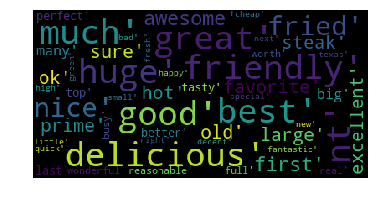

In [100]:
plt.figure()
plt.imshow(wordcloud1)
plt.axis("off")

savefig('adjective.png', bbox_inches='tight')
plt.show()  # show before savefig will reset the figure and you will save blank

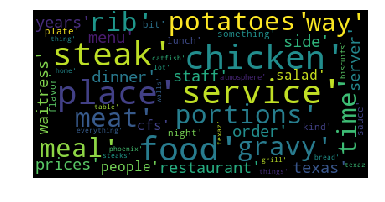

In [101]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

savefig('noun.png', bbox_inches='tight')
plt.show()

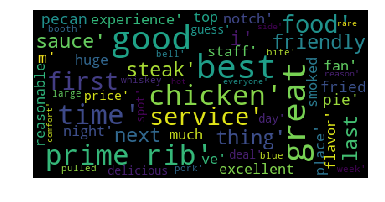

In [102]:
plt.figure()
plt.imshow(wordcloud2)
plt.axis("off")

savefig('adjectivePhrase.png', bbox_inches='tight')
plt.show()

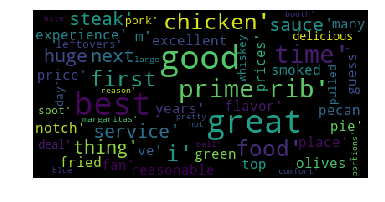

In [103]:
plt.figure()
plt.imshow(wordcloud3)
plt.axis("off")

savefig('sentiment.png', bbox_inches='tight')
plt.show()
